In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import random
import re

In [2]:
#pip install openpyxl
#pip install wordcloud

In [3]:
negativeTweets = pd.read_excel('./data/Tweets_Negative.xlsx',sheet_name="Negative_Tweets",engine='openpyxl')

In [4]:
tweetList = []
for i in range(len(negativeTweets)):
    tweetList += [negativeTweets.iloc[i][0]]
tweetList

['Hey @travelocity and @Delta ... Neither of you will let me change my upcoming flight on your websites and your actual wait time on the phone is 4+ HOURS?!?!? What the actual $#*@?!?!?? This is UNACCEPTABLE #travelocity #delta #fail',
 'Flew into #FortMyers on @delta &amp; flying out on @JetBlue due to timing. 100% missing the @delta experience. #delta #JetBlue',
 'Those afraid to Die, will never truly Live. \n\n#thoseafraidtodie#7fiveclothing #7five #bebadasseveryday #delta #goldtar # @ Gold Star Nutrition https://t.co/BOIjqnCSmb',
 'RT @riskmap_ : Police Arrest Three Suspected Kidnappers, Rescue Victim In #Delta #Nigeria #Security https://t.co/BwhC990aFj https://t.co/NkG1eNbE44',
 "#Delta Sucks. It's a 2 hour hold to change reservation. I'm now 1 hr and 15 minutes in to the hold.  Never will do business with them again!",
 '@Delta so it’s fine for someone to get on one of your flights with a cough, and no one will do anything about it because they clicked the boxes saying they don’t

In [5]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(tweetList)
X

<140x1177 sparse matrix of type '<class 'numpy.float64'>'
	with 3907 stored elements in Compressed Sparse Row format>

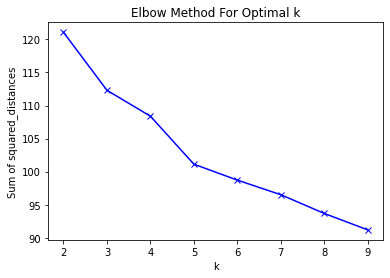

In [6]:
sumofsquareddistance = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   sumofsquareddistance.append(km.inertia_)
plt.plot(K, sumofsquareddistance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
random.seed(22)
idealK = 6
model = KMeans(n_clusters=idealK, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
tweetClusters=pd.DataFrame(list(zip(tweetList,labels)),columns=['tweet','cluster'])
print(tweetClusters.sort_values(by=['cluster']))
tweetClusters.groupby('cluster').count()

                                                 tweet  cluster
0    Hey @travelocity and @Delta ... Neither of you...        0
85   CAUTION LOCAL BC BUSINESSES\n#langley\n#surrey...        0
84   Nice eh? Ski season ended, they took the money...        0
83   RT @Kristy91808800 : Nice eh? Ski season ended...        0
82   Check out DELTA DPS-300AB-101 A Hard Disk Reco...        0
..                                                 ...      ...
102  #Delta plans to buy 25 Airbus planes amid expe...        5
101  RT @TechXplore_com : #Delta plans to buy 25 Ai...        5
76   #DELTA RS-15 SINGLE SPINDLE SHAPER https://t.c...        5
124  Anatomy Of Deltoids Side Bent Over Rows\n#delt...        5
65   RT @mxmovement : #Babangida defeated by #Abiol...        5

[140 rows x 2 columns]


,tweet
cluster,
0,78
1,14
2,11
3,11
4,8
5,18


Cluster: 0
Tweets
Hey @travelocity and @Delta ... Neither of you ...
Flew into #FortMyers on @delta &amp; flying out...
Those afraid to Die, will never truly Live. \n\...
#Delta Sucks. It's a 2 hour hold to change rese...
@Delta so it’s fine for someone to get on one o...
RT @kmarshford55 : #DELTA customer service is k...
RT @Ihufffreon : Bought a ticket from #Delta  f...
Bought a ticket from #Delta  for July. They the...
RT @kmarshford55 : #DELTA customer service is k...
#MLB #Coke #Delta  Go woke. Go broke.   You've ...
#DELTA customer service is killing me today.  C...
@Delta wanna change my flight and cut my vacati...
Spent over 3 hours today waiting for a rep at @...
#Results on #April 26\n\n#TechMahindra, #HDFCLi...
....required to be 10 weeks old. Kevin at the c...
I’ve never experienced worse customer service t...
@Delta Dear #Delta , I’m crushed💔\nWhy hang up ...
Don’t fly #delta. We had a delayed flight out o...
Had flights booked for July with @Delta, but fo...
RT @mkingsle 

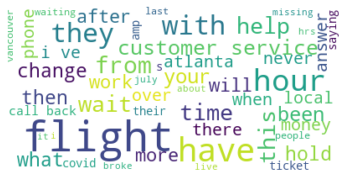

Cluster: 1
Tweets
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
RT @sassywaifucos : Just waiting to fight the H...
Just waiting to fight the Hokage like...⏰\n\nHe...
RT @DeepaOfKara : That wasn’t as hard as I thou...
RT @DeepaOfKara : That wasn’t as hard as I thou...
RT @DeepaOfKara : That wasn’t as hard as I thou...
That wasn’t as hard as I thought it’d be. There...


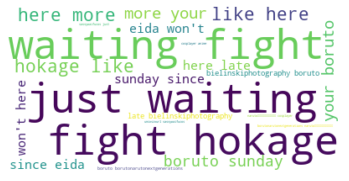

Cluster: 2
Tweets
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...
RT @RealCandaceO : Any corporation telling you ...


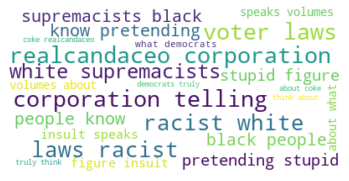

Cluster: 3
Tweets
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
RT @Kristy91808800 : Another Epidemologist call...
Another Epidemologist calls @DrBonnieHenry Dang...


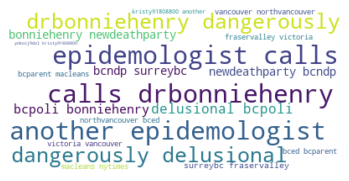

Cluster: 4
Tweets
RT @riskmap_ : Police Arrest Three Suspected Ki...
Police arrest three suspected kidnappers, rescu...
Police Arrest Three Suspected Kidnappers, Rescu...
RT @tdpel : Okowa Commissions Clean Water Proje...
Okowa Commissions Clean Water Project in Okpana...
RT @tdpel : Delta’s Teacher Development Centre ...
RT @tdpel : Delta’s Teacher Development Centre ...
Delta’s Teacher Development Centre To Train Tea...


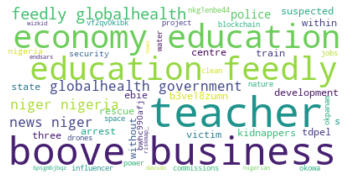

Cluster: 5
Tweets
#Delta #Esquimalt, #DIY #Forklift Operator Trai...
Delta A350 taking off from SLC airport   #AvGee...
First work trip in over a year. #MissionCritica...
RT @mxmovement : #Babangida defeated by #Abiola...
Catching some AIRbus. Head over to my IG page f...
RT @RubberNews : The EPA has granted an emergen...
#DELTA 33-895X RADIAL ARM SAW https://t.co/gCdm...
#DELTA RS-15 SINGLE SPINDLE SHAPER https://t.co...
#DELTA RS-15 SINGLE SPINDLE SHAPER https://t.co...
#DELTA RS-15 SINGLE SPINDLE SHAPER https://t.co...
The EPA has granted an emergency exemption allo...
#Delta Air Lines orders 25 additional #Airbus A...
#Delta, #SaintMaurice, #DIY #Forklift Operator ...
RT @TechXplore_com : #Delta plans to buy 25 Air...
#Delta plans to buy 25 Airbus planes amid expec...
DELTA CUBE 3 trademark filing with USPTO. Filed...
Delta Air Lines has firmed orders for 25 Airbus...
Anatomy Of Deltoids Side Bent Over Rows\n#delta...


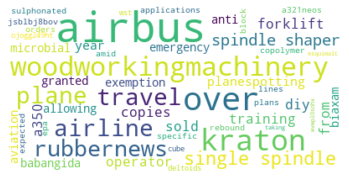

In [8]:
result=pd.DataFrame({'Cluster':labels,'Tweets':tweetList})
for k in range(0,idealK):
    s=result[result.Cluster==k]
    text=s['Tweets'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in re.split(r"[-;,\s]\s*",text) \
                  if word not in ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co'] and len(word) > 3 ])

    #print(text)
    #smallwords = [word for word in text.split() if len(word) < 4] 
    #print("smallwords", smallwords)
    exclude = ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co','that']
    wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=50,background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Tweets')
    tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
    print(tweets.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()